## Basics

In this tutorial we are covering the building blocks of the simetri.graphics as an overview. We will have tutorials for each of these objects and many others that will provide a more in-depth review.

# How to import *simetri.graphics*

*simetri.graphics* should be imported as ```import simetri.graphics as sg```.

> [!WARNING]  
> Never use ```from simetri.graphics import *```
>
> If you import everything, your namespace will be polluted and debugging will become very difficult.

## Canvas

`Canvas` is used for drawing objects and generating output files. When Canvas draws an object it creates a snapshot of the processed object and saves it, we call this a `Sketch`. Later modifications of this object will not affect this sketch. Sketches are frozen.
We will revisit the Canvas object at the end to explain the output creation process.

# *Shape* objects are polygonal chains that can be open or closed.

`Shape` objects are created by a given list of points. There are no Point objects in simetri.graphics, points are simply (x, y) tuples representing Cartesian coordinates. 

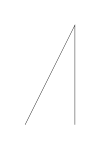

In [2]:
import simetri.graphics as sg

canvas = sg.Canvas()

points = [(0, 0), (50, 100), (50, 0)]
triangle = sg.Shape(points)

canvas.draw(triangle)

canvas.display()

> [!TIP]
> Shape objects are open by default.

They can be closed during creation or by setting `shape.closed = True`

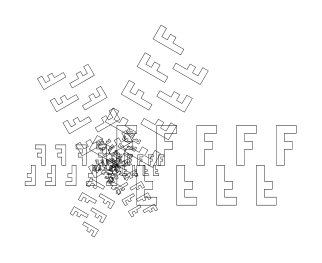

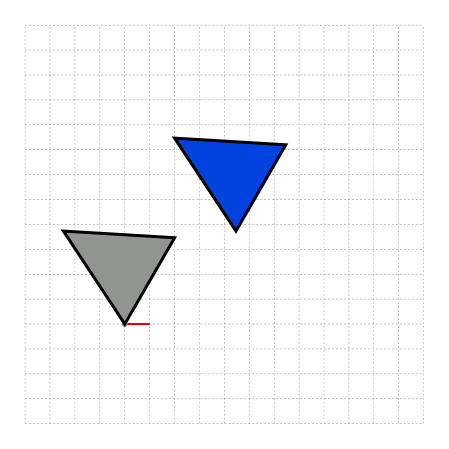

In [1]:
import simetri.graphics as sg

canvas = sg.Canvas()
canvas.help_lines()
points  = [(0, 0), (50, 100), (100, 0)]
shape = sg.Shape(points, closed=True, fill_color=sg.blue)
shape.rotate(sg.pi/3)
shape2 = shape.copy()
shape.fill_color=sg.gray
shape2.translate(shape.width, shape.height)
# shape2.rotate(sg.pi/2, about=shape2.center)
canvas.draw([shape, shape2], line_width=3)
# bbox = shape2.b_box
# shape3 = sg.Shape(bbox.corners, closed=True)
# canvas.draw(shape3, fill=False)
canvas.display()

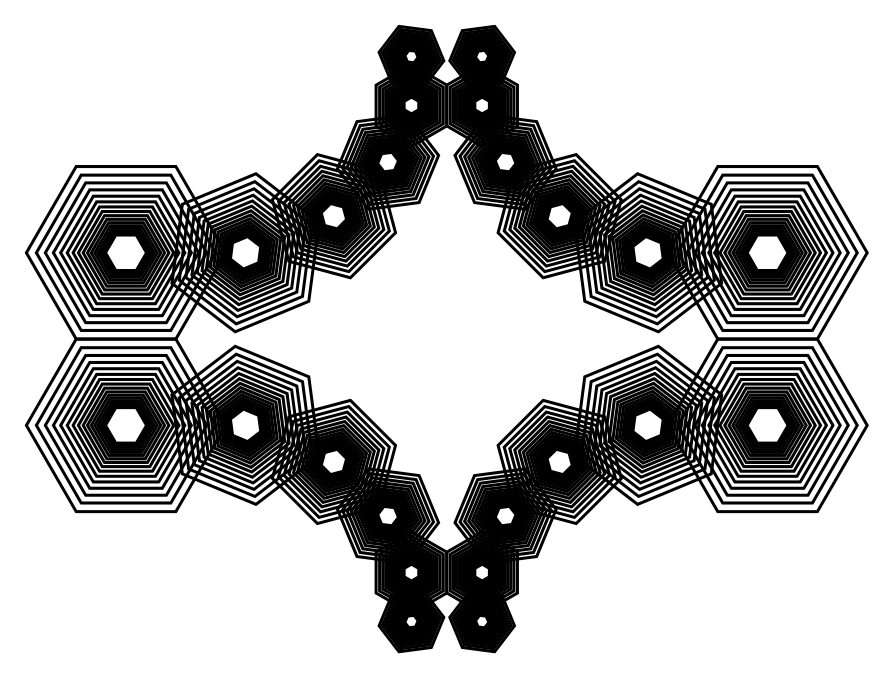

In [38]:
import simetri.graphics as sg

canvas = sg.Canvas()

hex = sg.reg_poly_shape((0, 0), 6)
hex.fill = False
hex.line_width=3
hexes = hex.scale(.9, about=hex.center, reps=15)
translation = sg.translation_matrix(150, 0)
rotation = sg.rotation_matrix(sg.pi/8)
scale = sg.scale_matrix(.8)
transform = rotation @ translation @ scale
hexes.transform(transform, reps=5)
hexes.mirror(hexes.right, reps=1).mirror(hexes.bottom, reps=1)
canvas.draw(hexes)

canvas.display()

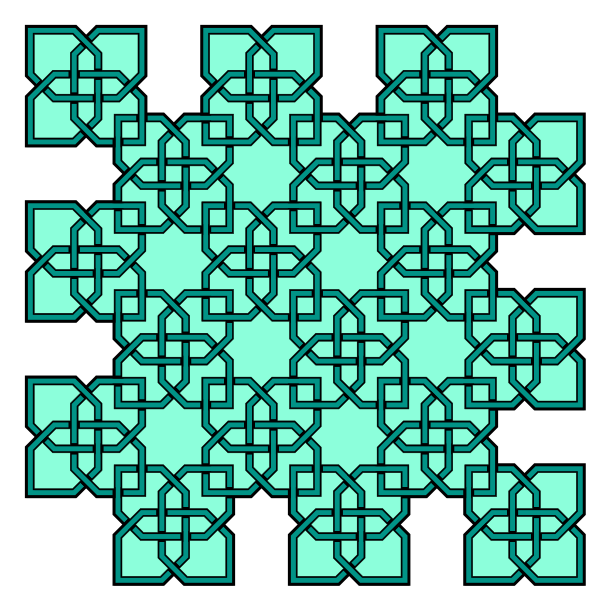

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

points = [(-15, 0), (-15, 40), (15, 70), (70, 70)]

shape = sg.Shape(points)
pattern = shape.mirror([(0, 0), (10, 10)], reps=1).rotate(sg.pi/2, reps=3)
pattern.translate(220, 0, reps=2).translate(110, -110, reps=1)
pattern.translate(0, -220, reps=2)
lace = sg.Lace(pattern.scale(.8), offset=4)
for plait in lace.plaits:
    canvas.draw(plait, fill_color=sg.teal, line_width=3)

for frag in lace.fragments:
    canvas.draw(frag, fill_color=sg.light_aqua)

canvas.display()
